In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import missingno as msno
import seaborn as sns

In [2]:
file_path = "C:/Users/maria/Documents/Documentos Pessoais/MBA/Mestrado/relatorio_validacao_v2/relatorio_validacao_v2.csv"

dados = pd.read_csv(file_path)

In [3]:
dados.info

<bound method DataFrame.info of             Região  Uf      IBGE       Municipio       CNES  Tipo Unidade  \
0          SUDESTE  MG  314610.0      OURO PRETO  2213737.0           NaN   
1          SUDESTE  MG  313620.0  JOÃO MONLEVADE  2170671.0           NaN   
2          SUDESTE  MG  313670.0    JUIZ DE FORA  2221713.0           2.0   
3          SUDESTE  MG  315780.0     SANTA LUZIA  6198341.0           NaN   
4          SUDESTE  MG  313890.0      MACHACALIS  6055036.0           2.0   
...            ...  ..       ...             ...        ...           ...   
10721358  NORDESTE  PE  261020.0         PANELAS  3935140.0           NaN   
10721359  NORDESTE  PE  261470.0        TACAIMBÓ  5737176.0           NaN   
10721360  NORDESTE  PE  260630.0         GRANITO  2635151.0           NaN   
10721361  NORDESTE  PE  261470.0        TACAIMBÓ  9384405.0           NaN   
10721362  NORDESTE  PE  261090.0       PESQUEIRA  7106726.0           NaN   

                INE  Tipo Equipe  Validação

Tranformando os dados para utilizarmos no formato esperado

In [22]:
# Corrigindo as colunas que deveriam ser string: IBGE, INE, Tipo Equipe

dados_final = dados
dados_final['Mes'] = dados_final['Mes'].astype(int).astype(str).str.zfill(2)
dados_final['Ano'] = dados_final['Ano'].astype(int).astype(str)
dados_final['IBGE'] = dados_final['IBGE'].astype(int).astype(str)
dados_final['CNES'] = dados_final['CNES'].astype(int).astype(str)
dados_final['Status'] = dados_final['Validação'].apply(lambda x: 'Aprovado' if x == 'Aprovado' else 'Outros')
dados_final['Tipo Unidade'] = dados_final['Tipo Unidade'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)
dados_final['INE'] = dados_final['INE'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)
dados_final['Tipo Equipe'] = dados_final['Tipo Equipe'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)
# TODO: Necessário confirmar se essa transformação está correta
dados_final['Total'] = dados_final['Total'].apply(lambda x: int(x) if pd.notnull(x) and x.is_integer() else int(x*1000) if pd.notnull(x) else x)

print(dados_final)

AttributeError: 'int' object has no attribute 'is_integer'

Analisando os dados recebidos

In [5]:
dados.Região.unique()

array(['SUDESTE', 'NORDESTE', 'NORTE', 'CENTRO-OESTE', 'SUL'],
      dtype=object)

In [6]:
dados.Uf.unique()

array(['MG', 'RN', 'PI', 'AL', 'AP', 'SP', 'DF', 'MT', 'PR', 'PE', 'GO',
       'MA', 'AM', 'PA', 'AC', 'TO', 'SE', 'ES', 'RJ', 'RS', 'CE', 'RO',
       'PB', 'BA', 'RR', 'MS', 'SC'], dtype=object)

In [7]:
len(dados.Uf.unique())

27

In [8]:
len(dados.Municipio.unique())

5298

In [9]:
dados.Validação.unique()

array(['Duplicado', 'Aprovado', 'Reprovado(PROF)', 'Não Aplicado',
       'Reprovado(CNES+INE)', 'Reprovado(CNES+PROF)',
       'Reprovado(INE+PROF)', 'Reprovado(CNES+INE+PROF)',
       'Reprovado(INE)', 'Reprovado(CNES)', 'Reprovado(CBO)',
       'Reprovado(PROF+CBO)', 'Reprovado(CNES+PROF+CBO)', 'Pendente',
       'Data inválida', 'Reprovado(INE+PROF+CBO)', 'Reprovado(CNES+CBO)',
       'Reprovado(CNES+INE+PROF+CBO)', 'Preliminar>Aprovado',
       'Preliminar>Reprovado(PROF)', 'Preliminar>Reprovado(INE)',
       'Preliminar>Reprovado(CNES+INE)', 'Preliminar>Reprovado(INE+PROF)',
       'Preliminar>Reprovado(CNES)', 'Preliminar>Reprovado(CNES+PROF)',
       'Preliminar>Reprovado(CNES+INE+PROF)', 'Reprovado(INE+CBO)',
       'Reprovado(CNES+INE+CBO)'], dtype=object)

In [10]:
len(dados.Validação.unique())

28

In [11]:
pd.set_option('display.float_format', '{:,.0f}'.format)

dados.describe().round(2)

,Total
count,"10,721,363"
mean,705
std,"1,789"
min,1
25%,15
50%,89
75%,649
max,"334,810"


Refazer a análise por Região

In [12]:
dados[dados['Total'] > 100000]

,Região,Uf,IBGE,Municipio,CNES,Tipo Unidade,INE,Tipo Equipe,Validação,Total,Mes,Ano
11440,SUDESTE,MG,317020,UBERLÂNDIA,9686940,2,NaN,NaN,Não Aplicado,156775,10,2021
216182,NORTE,AM,130120,COARI,3237931,NaN,1499637,NaN,Duplicado,122708,07,2024
216282,NORTE,AM,130120,COARI,2011999,NaN,8354,NaN,Duplicado,107566,07,2024
218049,NORTE,AM,130120,COARI,2011980,NaN,2322250,NaN,Duplicado,115318,07,2024
218665,NORTE,AM,130120,COARI,7888457,NaN,1502980,NaN,Duplicado,114372,07,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
10073080,SUDESTE,RJ,330190,ITABORAÍ,2269236,NaN,292192,NaN,Duplicado,102088,06,2023
10493596,SUDESTE,RJ,330190,ITABORAÍ,2290316,NaN,292214,NaN,Duplicado,120488,06,2022
10585013,CENTRO-OESTE,MT,510525,LUCAS DO RIO VERDE,2533715,NaN,NaN,NaN,Duplicado,101470,03,2023
10706280,NORTE,AM,130120,COARI,2011980,NaN,8281,NaN,Duplicado,124404,03,2022


(array([8.071908e+06, 7.728390e+05, 5.821400e+05, 4.295250e+05,
        2.957270e+05, 1.961050e+05, 1.260350e+05, 8.017800e+04,
        5.035800e+04, 3.183900e+04, 2.108600e+04, 1.436800e+04,
        9.889000e+03, 7.078000e+03, 5.230000e+03, 3.917000e+03,
        3.078000e+03, 2.365000e+03, 1.877000e+03, 1.554000e+03,
        1.316000e+03, 1.066000e+03, 9.690000e+02, 7.760000e+02,
        6.500000e+02, 6.490000e+02, 5.360000e+02, 4.560000e+02,
        4.520000e+02, 4.030000e+02, 3.580000e+02, 3.440000e+02,
        3.010000e+02, 2.990000e+02, 2.690000e+02, 2.330000e+02,
        2.280000e+02, 2.020000e+02, 1.640000e+02, 1.800000e+02,
        1.530000e+02, 1.800000e+02, 1.660000e+02, 1.400000e+02,
        1.440000e+02, 1.270000e+02, 1.390000e+02, 1.140000e+02,
        1.210000e+02, 1.110000e+02, 1.150000e+02, 1.070000e+02,
        6.700000e+01, 9.700000e+01, 9.200000e+01, 7.600000e+01,
        6.600000e+01, 7.000000e+01, 7.600000e+01, 6.300000e+01,
        6.500000e+01, 6.400000e+01, 4.90

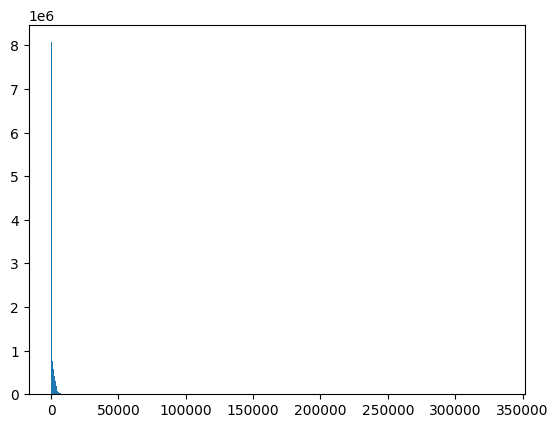

In [13]:
# Histograma da quantidade de atendimentos
plt.hist(dados['Total'], bins=500)

<Axes: xlabel='Total'>

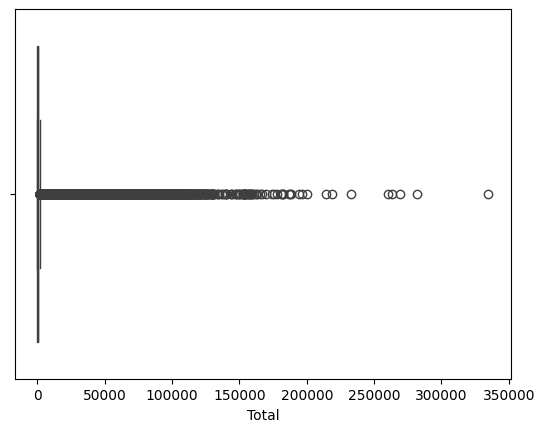

In [14]:
# Box plot dos dados 
sns.boxplot(x='Total',data= dados, showfliers=True)

Aplicando filtros para remover os outliers

In [7]:

# Considerando os atendimentos com mais de 1000 como outliers
dados_filtrados = dados[(dados['Total'] < 1000) & ( dados['Validação'] != 'Duplicado')]

In [16]:
dados[(dados['Validação'] == 'Duplicado')]

,Região,Uf,IBGE,Municipio,CNES,Tipo Unidade,INE,Tipo Equipe,Validação,Total,Mes,Ano
0,SUDESTE,MG,314610,OURO PRETO,2213737,NaN,260460,NaN,Duplicado,381,10,2021
1,SUDESTE,MG,313620,JOÃO MONLEVADE,2170671,NaN,251453,NaN,Duplicado,477,10,2021
3,SUDESTE,MG,315780,SANTA LUZIA,6198341,NaN,268674,NaN,Duplicado,120,10,2021
5,SUDESTE,MG,315780,SANTA LUZIA,2164310,NaN,268429,NaN,Duplicado,63,10,2021
6,SUDESTE,MG,314430,NANUQUE,3742059,NaN,258881,NaN,Duplicado,207,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
10721358,NORDESTE,PE,261020,PANELAS,3935140,NaN,2404311,NaN,Duplicado,4,03,2024
10721359,NORDESTE,PE,261470,TACAIMBÓ,5737176,NaN,159670,NaN,Duplicado,53,03,2024
10721360,NORDESTE,PE,260630,GRANITO,2635151,NaN,142859,NaN,Duplicado,92,03,2024
10721361,NORDESTE,PE,261470,TACAIMBÓ,9384405,NaN,2168847,NaN,Duplicado,16,03,2024


In [17]:
dados[(dados['Total'] < 1000)]

,Região,Uf,IBGE,Municipio,CNES,Tipo Unidade,INE,Tipo Equipe,Validação,Total,Mes,Ano
0,SUDESTE,MG,314610,OURO PRETO,2213737,NaN,260460,NaN,Duplicado,381,10,2021
1,SUDESTE,MG,313620,JOÃO MONLEVADE,2170671,NaN,251453,NaN,Duplicado,477,10,2021
2,SUDESTE,MG,313670,JUIZ DE FORA,2221713,2,NaN,NaN,Aprovado,14,10,2021
3,SUDESTE,MG,315780,SANTA LUZIA,6198341,NaN,268674,NaN,Duplicado,120,10,2021
4,SUDESTE,MG,313890,MACHACALIS,6055036,2,254304,70,Aprovado,49,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
10721358,NORDESTE,PE,261020,PANELAS,3935140,NaN,2404311,NaN,Duplicado,4,03,2024
10721359,NORDESTE,PE,261470,TACAIMBÓ,5737176,NaN,159670,NaN,Duplicado,53,03,2024
10721360,NORDESTE,PE,260630,GRANITO,2635151,NaN,142859,NaN,Duplicado,92,03,2024
10721361,NORDESTE,PE,261470,TACAIMBÓ,9384405,NaN,2168847,NaN,Duplicado,16,03,2024


In [18]:
dados['Total'].sort_values()

5415719         1
5415669         1
5415685         1
741473          1
741471          1
            ...  
7457270    260611
3194001    262957
8890891    269241
8891436    281752
8892859    334810
Name: Total, Length: 10721363, dtype: int64

(array([686313., 252516., 186913., 162905., 148070., 137979., 128550.,
        123430., 116955., 107806.,  95173.,  81767.,  74053.,  69764.,
         67098.,  64192.,  62067.,  60267.,  58407.,  56839.,  55195.,
         54197.,  52329.,  50842.,  50062.,  48822.,  47835.,  46610.,
         46418.,  45382.,  44632.,  44417.,  43246.,  42310.,  41381.,
         40949.,  40184.,  39264.,  38712.,  38199.,  37499.,  36609.,
         36064.,  35160.,  34708.,  33852.,  33151.,  32856.,  31666.,
         31095.,  30617.,  29945.,  29603.,  28752.,  27944.,  27735.,
         27034.,  26494.,  25846.,  24776.,  24668.,  24289.,  23658.,
         23409.,  22691.,  22168.,  21650.,  21099.,  20419.,  20517.,
         19837.,  19456.,  18905.,  18607.,  18289.,  17798.,  17530.,
         17223.,  16593.,  16418.,  15954.,  15714.,  15310.,  15282.,
         14826.,  14329.,  14181.,  13917.,  13577.,  13276.,  13059.,
         12917.,  12572.,  12323.,  12264.,  11975.,  11729.,  11552.,
      

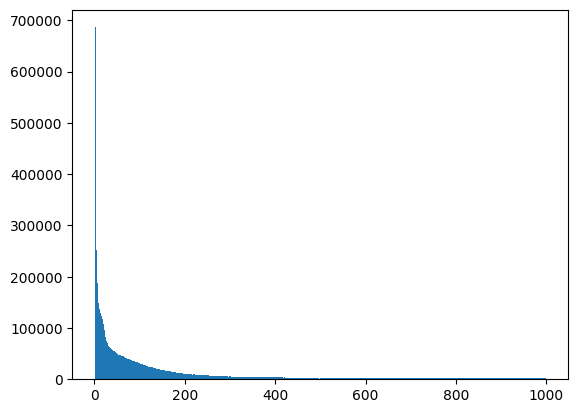

In [19]:
plt.hist(dados_filtrados['Total'], bins=500)

<Axes: xlabel='Total'>

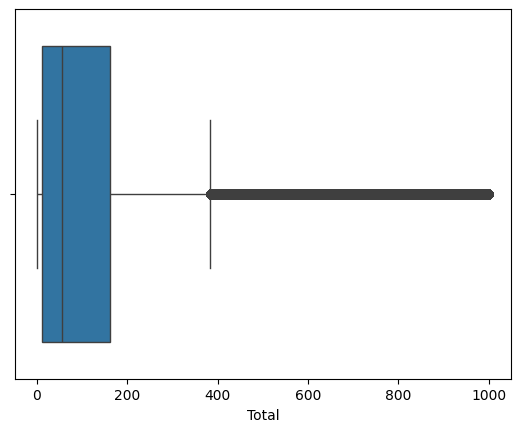

In [6]:
# Box plot dos dados, com os filtros 
sns.boxplot(x='Total',data= dados_filtrados, showfliers=True)

In [8]:
def make_raincloud (feature , df):
    '''
    Produz raincloud plots através da plotagem de meio violino e striplot do
    seaborn. Apresenta também marcação de média e boxplot sobreposto para cada
    feature do dataframe.
    Recebe: lista de colunas numéricas nomeadas para plotar e dataframe
    Retorna: gráficos horizontais unitários para cada coluna nomeada
    '''
    plt.figure(figsize=( 15, 2))
    # Create violin plots without mini-boxplots inside
    ax = sns.violinplot(x = feature, data = df,
    color = 'goldenrod' , cut = 0, inner = None)
    # Clip the lower half of each violin
    for item in ax.collections:
        x0, y0, width, height = item.get_paths()[ 0].get_extents().bounds
        item.set_clip_path(plt.Rectangle((x0, y0), width, height/ 2, transform=ax.transData))
    # Create strip plots with partially transparent points
    num_items = len(ax.collections)
    sns.stripplot(x = feature, data = df, color = 'navy', marker = 'o', alpha= 0.1)
    # Shift each strip plot strictly below the correponding volin
    for item in ax.collections[num_items:]:
        item.set_offsets(item.get_offsets() + np.array(( 0,0.2)))
    # Create narrow boxplots on top of the violin and strip plots
    sns.boxplot(x = feature, data=df, width= 0.10, showfliers= False, showmeans= True,
        meanprops= dict(marker= '^', markerfacecolor= 'red', markeredgecolor= 'red', markersize= 5, zorder= 3),
        boxprops= dict(facecolor=( 0,0,0,0), linewidth= 2, zorder= 3),
        whiskerprops= dict(linewidth= 2),
        capprops= dict(linewidth= 2),
        medianprops= dict(linewidth= 2))
    plt.tick_params(left = False)
    plt.show()


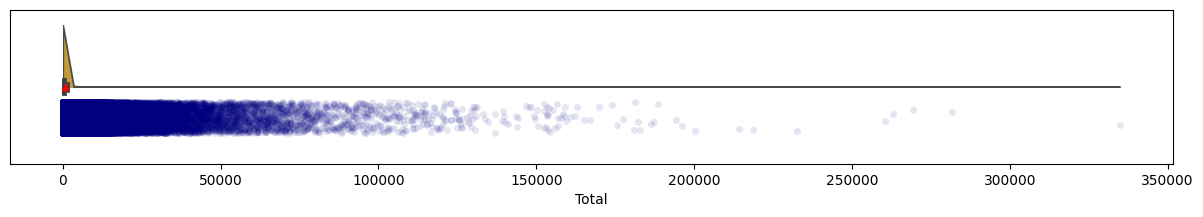

In [9]:
make_raincloud('Total', dados)

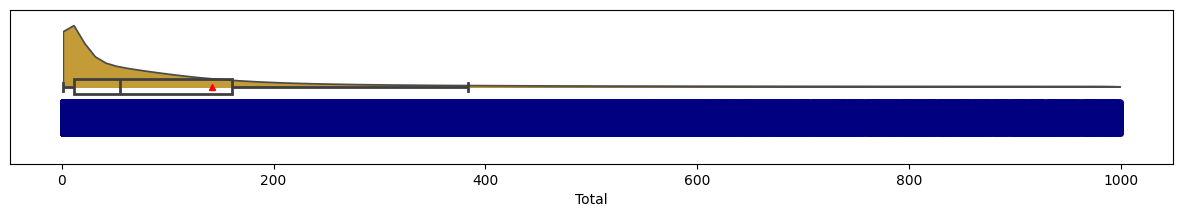

In [10]:
make_raincloud('Total', dados_filtrados)

In [8]:
msno.bar(dados, sort='ascending')
msno.matrix(dados)


MemoryError: Unable to allocate 164. MiB for an array with shape (10721363, 2) and data type float64

Error in callback <function _draw_all_if_interactive at 0x0000023DC0B47600> (for post_execute), with arguments args (),kwargs {}:


MemoryError: Unable to allocate 1.92 GiB for an array with shape (10721363, 12, 4) and data type float32

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\formatters.py", line 226, in catch_format_error
    r = method(self, *args, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\formatters.py", line 343, in __call__
    return printer(obj)
           ^^^^^^^^^^^^
  File "C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py", line 170, in print_figure
    fig.canvas.print_figure(bytes_io, **kw)
  File "C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\backend_bases.py", line 2204, i

<Figure size 2500x1000 with 3 Axes>

MemoryError: Unable to allocate 1.92 GiB for an array with shape (10721363, 12, 4) and data type float32

<Figure size 2500x1000 with 2 Axes>

In [6]:
dados_ibge = dados.groupby('IBGE')['Total'].sum()

In [23]:
# Carregar o shapefile dos estados do Brasil (arquivo baixado shapefile do IBGE 2022)
shapefile_path = 'C:\\Users\\maria\\Documents\\Documentos Pessoais\\MBA\\Mestrado\\relatorio_validacao_v2\\BR_Municipios_2022\\BR_Municipios_2022.shp' 
brasil = gpd.read_file(shapefile_path)

In [24]:
brasil

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-60.82135 -13.1191, -60.81773 -13.12..."
...,...,...,...,...,...
5567,5222005,Vianópolis,GO,954.115,"POLYGON ((-48.31126 -16.84221, -48.3117 -16.84..."
5568,5222054,Vicentinópolis,GO,733.794,"POLYGON ((-49.73613 -17.74427, -49.73624 -17.7..."
5569,5222203,Vila Boa,GO,1052.593,"POLYGON ((-47.0778 -15.06364, -47.07799 -15.06..."
5570,5222302,Vila Propício,GO,2181.593,"POLYGON ((-48.58713 -15.31847, -48.58714 -15.3..."


In [25]:
# Garantir que os códigos IBGE estão como strings para fazer o merge: 
# https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html
brasil['CD_MUN'] = brasil['CD_MUN'].astype(str).str[:6]

In [26]:
# Juntar os dados com o shapefile
mapa = brasil.merge(dados_ibge, left_on='CD_MUN', right_on='IBGE')

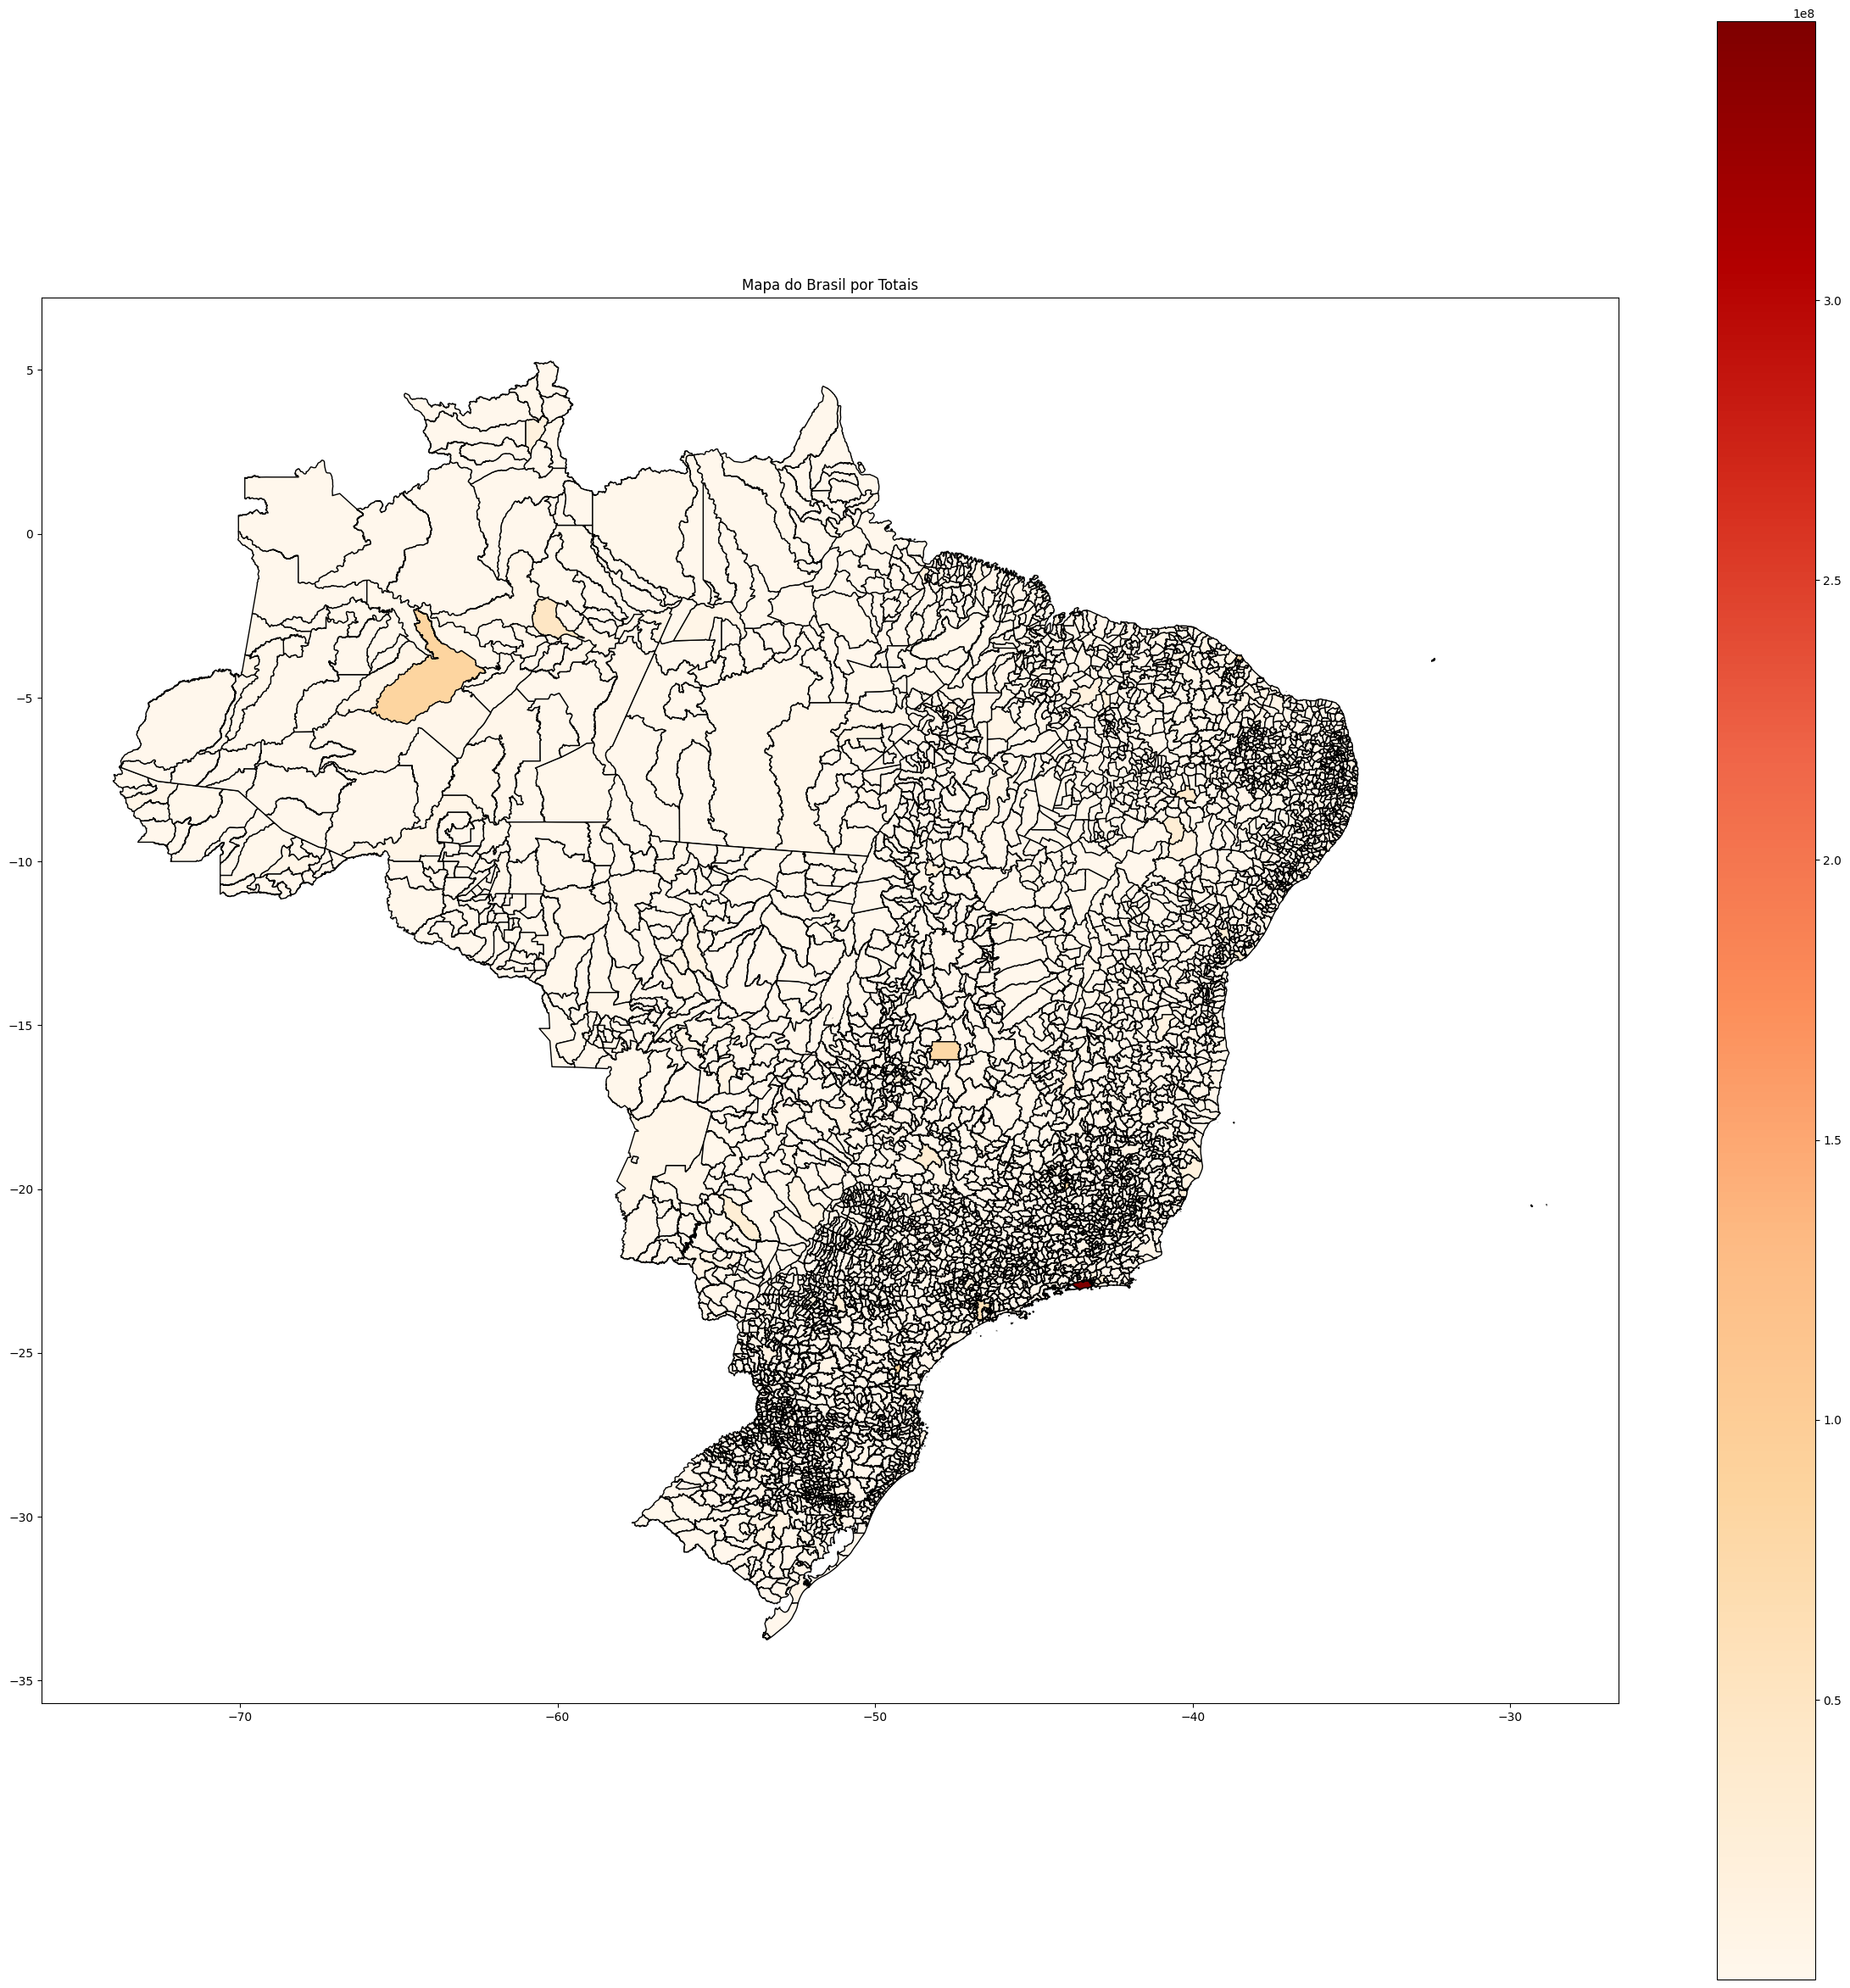

In [27]:
# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
mapa.plot(column='Total', ax=ax, legend=True,
          cmap='OrRd',  # Mapa de cores
          edgecolor='black')  # Cor da borda dos estados

# Adicionar título
plt.title('Mapa do Brasil por Totais')

# Mostrar o mapa
plt.show()

Gráfico por estado

In [13]:
# Carregar o shapefile dos estados do Brasil (arquivo baixado shapefile do IBGE 2022)
shapefile_path = 'C:\\Users\\maria\\Documents\\Documentos Pessoais\\MBA\\Mestrado\\relatorio_validacao_v2\\BR_UF_2022\\BR_UF_2022.shp' 
brasil_uf = gpd.read_file(shapefile_path)

In [14]:
brasil_uf

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9..."
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242..."
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ..."
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ..."
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.2483 -13.19239, -48.24844 -13.19..."
5,21,Maranhão,MA,Nordeste\n,329651.496,"MULTIPOLYGON (((-44.5868 -2.23341, -44.58696 -..."
6,22,Piauí,PI,Nordeste\n,251755.481,"POLYGON ((-42.47034 -3.48377, -42.46126 -3.484..."
7,23,Ceará,CE,Nordeste\n,148894.447,"POLYGON ((-37.87162 -4.3664, -37.87109 -4.3670..."
8,24,Rio Grande do Norte,RN,Nordeste\n,52809.599,"MULTIPOLYGON (((-35.18728 -5.78987, -35.18707 ..."
9,25,Paraíba,PB,Nordeste\n,56467.242,"MULTIPOLYGON (((-34.7958 -7.175, -34.79578 -7...."


In [17]:
dados_uf = dados.groupby('Uf')['Total'].sum()

In [19]:
# Juntar os dados com o shapefile
mapa_uf = brasil_uf.merge(dados_uf, left_on='SIGLA_UF', right_on='Uf')

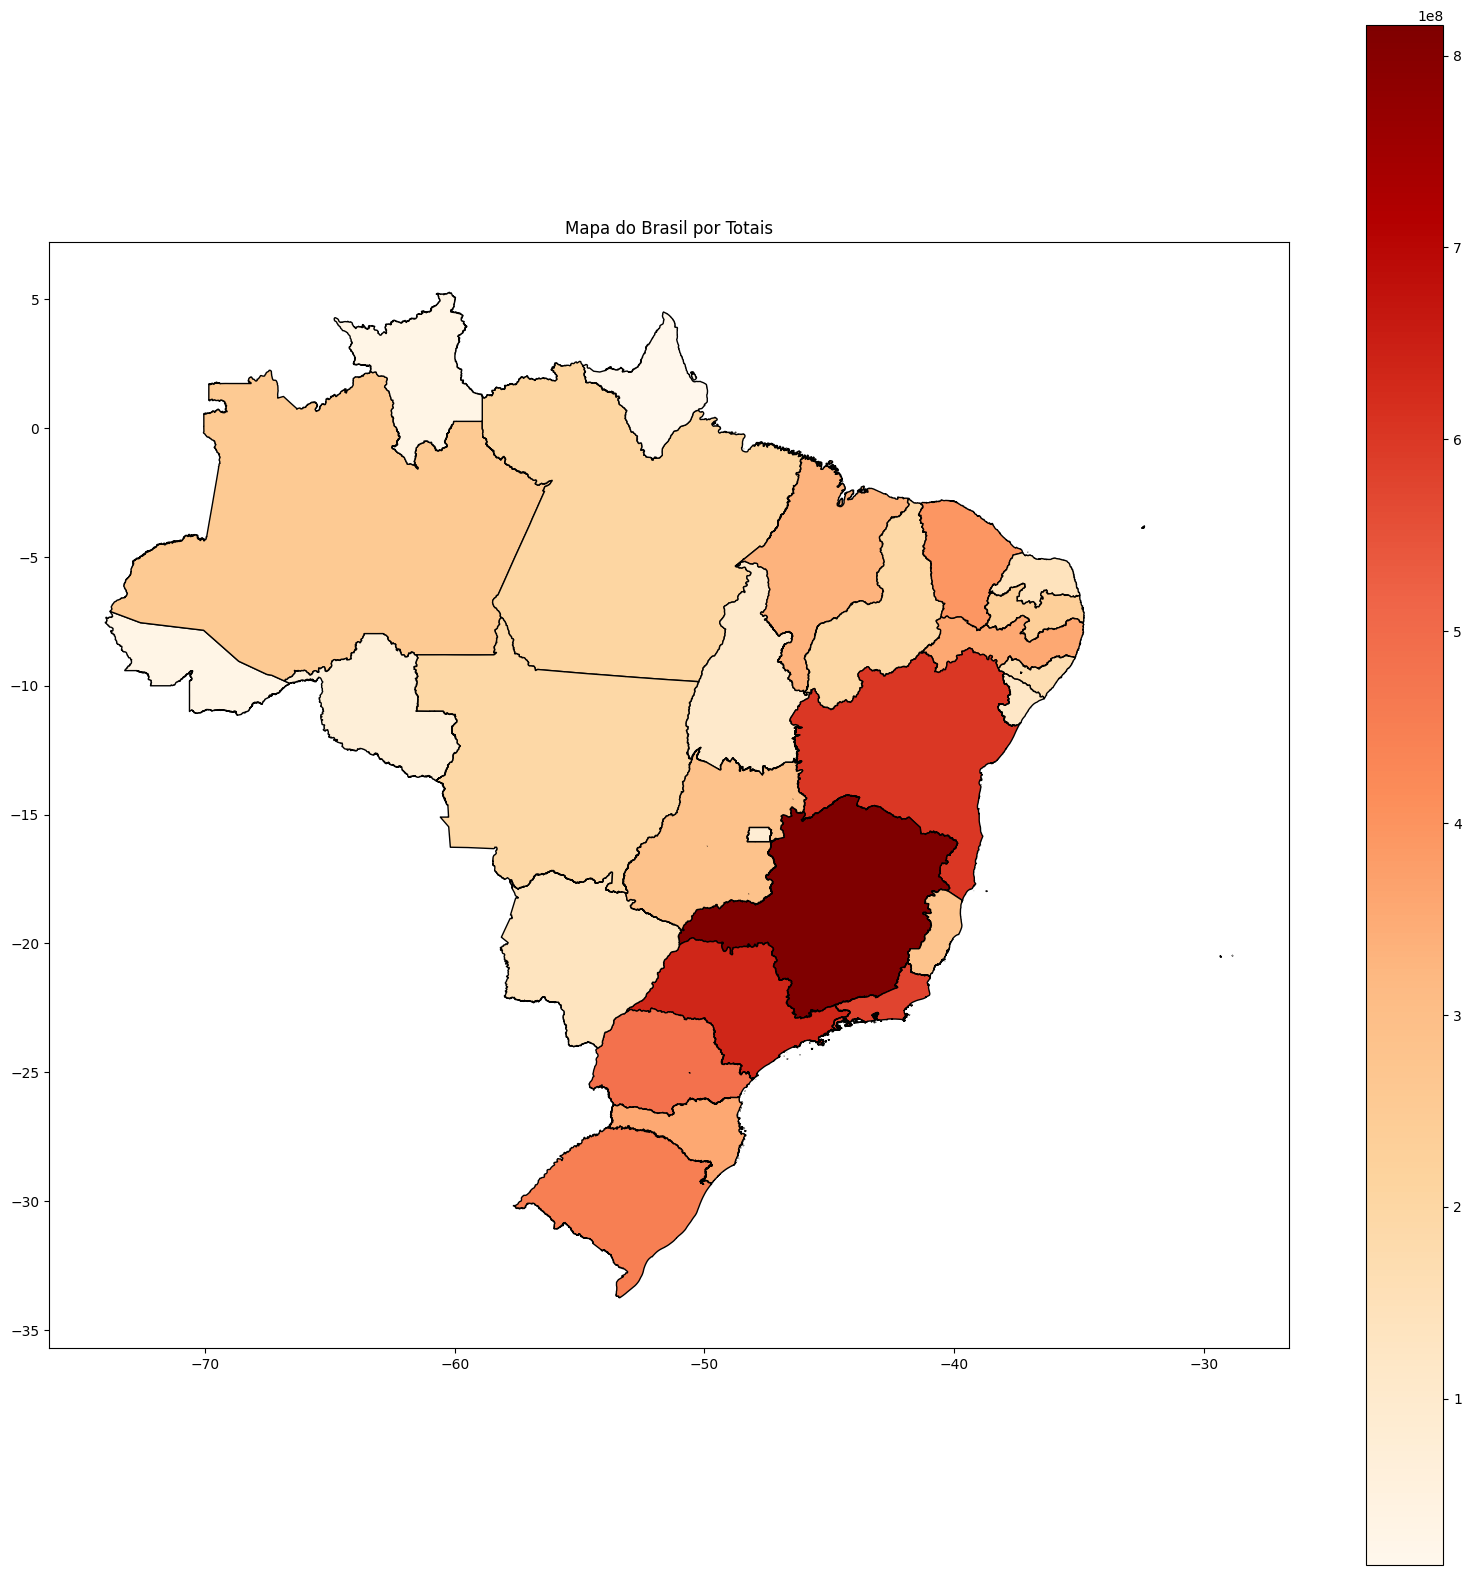

In [21]:
# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
mapa_uf.plot(column='Total', ax=ax, legend=True,
          cmap='OrRd',  # Mapa de cores
          edgecolor='black')  # Cor da borda dos estados

# Adicionar título
plt.title('Mapa do Brasil por Totais por estado')

# Mostrar o mapa
plt.show()